# **Principal Component Analysis**

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

plt.rcParams['figure.figsize'] = (17, 10)

### **Retrieving Features and Labels from npz file**

In [27]:
npzfile = np.load('/Users/kaushikpatil/Desktop/CSYE7105_FinalProject/data/melspect.npz', allow_pickle=True)

In [28]:
X_train, y_train = npzfile['X_train'], npzfile['y_train']
X_test, y_test = npzfile['X_test'], npzfile['y_test']

### **Matrix to Vector Conversion**

In [29]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

In [30]:
X_train.shape

(900, 81920)

To gain some intuition into the relationships between the spectrograms we can use PCA to project them into two dimensions.

In [31]:
pca = PCA(n_components=2)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

In [32]:
X = np.concatenate((X_train_reduced, X_test_reduced), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

In [33]:
X.shape, y.shape

((1000, 2), (1000,))

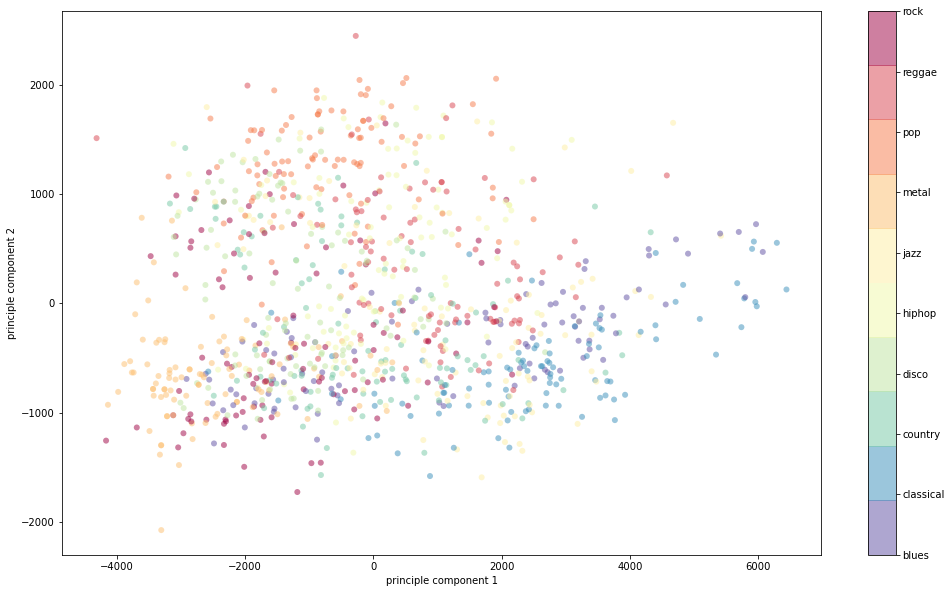

In [34]:
genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

plt.scatter(X[:, 0], X[:, 1],
            c=y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral_r', 10))
plt.xlabel('principle component 1')
plt.ylabel('principle component 2')
cbar = plt.colorbar()
cbar.set_ticks(range(10))
cbar.set_ticklabels(genres)

There apears to be some separability between the spectrograms 2 leading principle components, this means we could likely use SVM and KNN as our basline models before trying something like a neural net.

In [35]:
pca = PCA().fit(X_train)

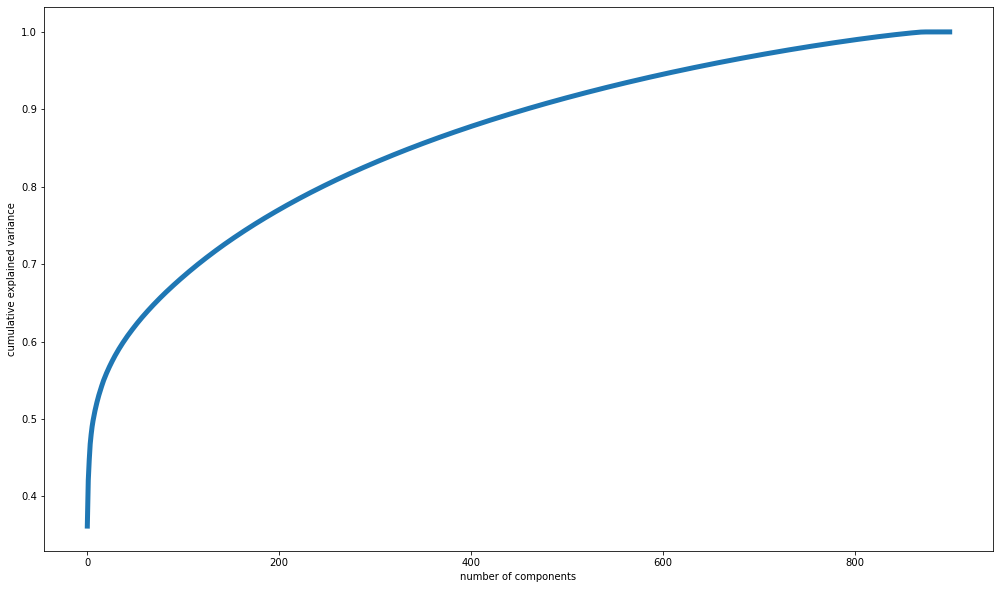

In [36]:
plt.plot(np.cumsum(pca.explained_variance_ratio_), lw=5)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

This curve quantifies how much of the total, 81920-dimensional variance is contained within the first N components. For example, we see that with the first 190 principle components contain approximately 75% of the variance, while you need around 850 components to describe close to 100% of the variance. We can also see that after 850ish principle components the remaining components explain none of the variance. This tells us we should definitly be performing PCA before throwing the data into our models. This is also important because while performing PCA we are effectively keeping the parts of the songs that make them stand out and removing the similar parts, this will help us better differentiate the genres.